<a href="https://colab.research.google.com/github/ragul-n/Analysis-of-Ashoka-University-Confession-page/blob/master/Analysis_of_Confessions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:

import pandas as pd
import numpy as np
import seaborn as sns 

import os
import random
try:
 from PIL import Image
except ImportError:
 import Image
import matplotlib.pyplot as plt
from textblob import TextBlob

### Sentiment Analysis

In [93]:
sentiments= pd.read_csv("/content/drive/MyDrive/au.rants.23/emotions.csv")
sentiments["Date"]=pd.to_datetime(sentiments["Date"], yearfirst=True)

sentiments.head()

,Unnamed: 0,positive,neutral,negative,rant,Date,id,sentiment
0,0,0.56,0.41,0.03,CUPCAKES ROCK,2021-06-25,145,positive
1,1,0.04,0.94,0.02,Would you connect with your ex on Linkedin? A...,2021-06-25,1098,neutral
2,2,0.00,0.00,1.00,"""I have a crush on this, I have a crush on th...",2021-06-25,3,negative
3,3,0.35,0.13,0.52,"AHOY I have a phone worth 8k, a laptop that I...",2021-06-25,39,negative
4,4,0.02,0.44,0.54,It's not real you've never even met the dude,2021-06-25,649,negative


Text(0.5, 1.0, '5 Days Rolling Average sentiment of Rants')

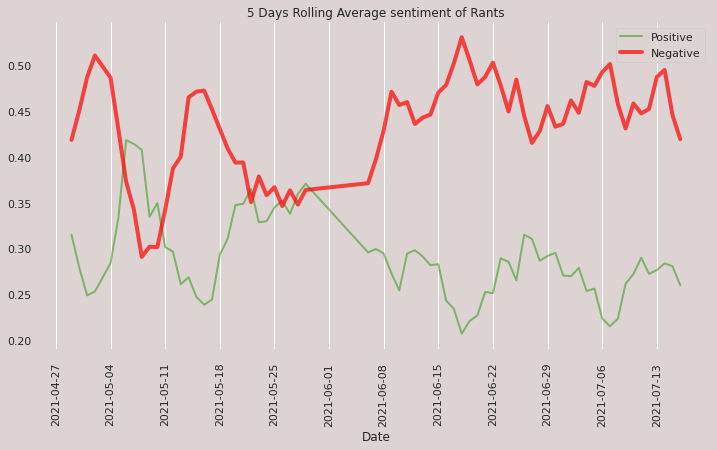

In [46]:
import matplotlib.dates as md


plt.style.use('dark_background') 
sns.set(rc={'axes.facecolor':'#DDD3D3', 'figure.facecolor':'#DDD3D3'})


def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

mean_by_date= sentiments.groupby("Date").agg(np.mean)

#No of rants by Date
data= sentiments["Date"]
data=pd.DataFrame(data)
data["ones"]=1
n_rants= data.groupby("Date").agg(np.sum)

fig, ax= plt.subplots(figsize=(12,6))


ax=sns.lineplot(y=moving_average(mean_by_date["positive"].values,5),color="#209100", x=mean_by_date.index[4:] , label="Positive", alpha=0.7,  linewidth=2)
#ax.axhline(sentiments.positive.mean(), ls="--", color="green", alpha=0.5)

#ax=sns.lineplot(y=moving_average(mean_by_date["neutral"].values, 5), x=mean_by_date.index[4:],  label="neutral",  color="blue", alpha=0.5 ,  linewidth=2)
#ax.axhline(sentiments.neutral.mean(), ls="--", color="blue", alpha=0.5)

ax=sns.lineplot(y=moving_average(mean_by_date["negative"].values, 5),color="#FF0000", x=mean_by_date.index[4:],  label="Negative", ax=ax, alpha=0.7,  linewidth=4)
#ax.axhline(sentiments.negative.mean(), ls="--", color="red" , alpha=1)


# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'),)
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)


#ax.text(mean_by_date.index[-1], 0.44, "Mean: Negative")
#ax.text(mean_by_date.index[-1], 0.29, "Mean: Positve")
#ax.text(mean_by_date.index[-1], 0.26, "Mean: Neutral")

ax.grid(axis="y")



sns.despine(left=True, bottom=True, right=True)

ax.set_title("5 Days Rolling Average sentiment of Rants")



datetime.datetime(2021, 5, 11, 0, 0)

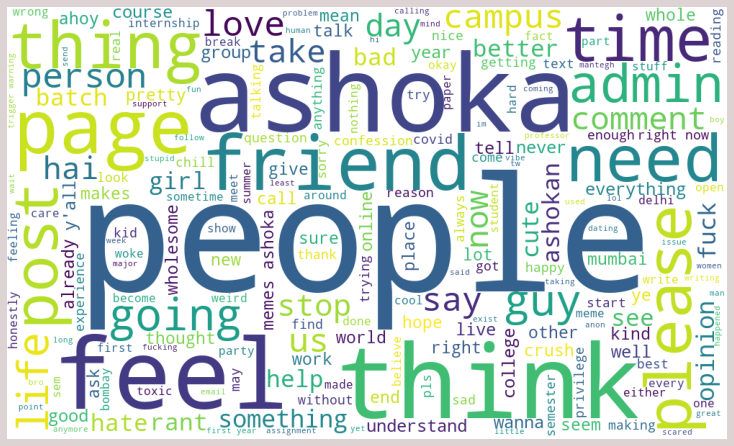

In [47]:
 from wordcloud import WordCloud, STOPWORDS


comment_words = ''
stopwords = (STOPWORDS)

stopwords = list(stopwords) + ["much", "literally","ok","many", "word", "saying", "make", "might", "really", "one", "actually", 
                               "want", "still", "keep","want", "know", "even", "entire", "go", "way", "maybe", "will", "everyone",
                               "anyone", "someone", "back"]
 
# iterate through the csv file
for val in sentiments.rant:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### LDA : Topic Modeling

In [48]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *


import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [52]:
stemmer = SnowballStemmer("english")

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [53]:
rants=list(sentiments.rant.dropna())

preprocessed_rants=[]
for rant in rants:
    preprocessed_rants.append(preprocess(rant))



###Bag of Words

In [109]:

'''
Create a dictionary from 'processed_docs' containing the number of times a word appears 
in the training set using gensim.corpora.Dictionary and call it 'dictionary'
'''
dictionary = gensim.corpora.Dictionary(preprocessed_rants)

#filtering extreams
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= None)

In [110]:

'''
Create the Bag-of-words model for each document i.e for each document we create a dictionary reporting how many
words and how many times those words appear. Save this to 'bow_corpus'
'''
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_rants]

### Running LDA using Bag of Words

In [111]:
# TODO
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 6, 
                                   id2word = dictionary,                                    
                                   passes = 50,
                                   workers = 5, 
                                )

for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.111*"admin" + 0.109*"page" + 0.065*"love" + 0.060*"rant" + 0.057*"meme" + 0.055*"ashoka" + 0.042*"question" + 0.041*"post" + 0.035*"wanna" + 0.033*"confess"


Topic: 1 
Words: 0.070*"ashoka" + 0.040*"good" + 0.038*"kid" + 0.032*"bombay" + 0.030*"batch" + 0.026*"experi" + 0.025*"come" + 0.024*"better" + 0.024*"hope" + 0.024*"covid"


Topic: 2 
Words: 0.052*"go" + 0.048*"post" + 0.031*"live" + 0.030*"fuck" + 0.029*"opinion" + 0.028*"hate" + 0.028*"ashokan" + 0.026*"thing" + 0.025*"actual" + 0.024*"person"


Topic: 3 
Words: 0.048*"feel" + 0.041*"campus" + 0.034*"year" + 0.031*"cancel" + 0.028*"life" + 0.027*"mind" + 0.026*"help" + 0.025*"thing" + 0.023*"stop" + 0.022*"work"


Topic: 4 
Words: 0.070*"girl" + 0.065*"crush" + 0.058*"cute" + 0.054*"need" + 0.049*"cours" + 0.049*"tell" + 0.034*"summer" + 0.034*"write" + 0.033*"internship" + 0.032*"guy"


Topic: 5 
Words: 0.091*"want" + 0.089*"friend" + 0.058*"talk" + 0.054*"person" + 0.050*"make" + 0.037*"time" + 0.031*"sta

Tpoic 1: we have a Crush

Topic 2: Online Classs 

Topic 3: Delhi-Mumbai wallas

Topic 4: Lockdown Matters!

Topic 5: This page exists

Topic 6: My Opnion Matters!

In [70]:
rant_topics=[]

for rant in rants:
    scores = lda_model[dictionary.doc2bow(preprocess(rant))]

    t=scores[0][1]
    c=scores[0][0]

    if scores[0][1] > 0.1666666 and scores[0][1] < 0.1666668 :
        c=np.nan

    for topic, score in scores[1:]:
        if score > t:
            c=topic
            t=score
    rant_topics.append({"rant":rant, "topic":c})


rant_by_topic=pd.DataFrame(rant_topics)
rant_by_topic.to_csv("/content/drive/MyDrive/au.rants.23/rants_by_topics_v2.csv")

In [90]:

rant_by_topics= pd.read_csv("/content/drive/MyDrive/au.rants.23/rants_by_topics.csv")


In [94]:
sentiments = sentiments.merge(rant_by_topics, on="rant")

In [95]:
sentiments.head()

,Unnamed: 0_x,positive,neutral,negative,rant,Date,id,sentiment,Unnamed: 0_y,topic
0,0,0.56,0.41,0.03,CUPCAKES ROCK,2021-06-25,145,positive,0,NaN
1,1,0.04,0.94,0.02,Would you connect with your ex on Linkedin? A...,2021-06-25,1098,neutral,1,1.0
2,2,0.00,0.00,1.00,"""I have a crush on this, I have a crush on th...",2021-06-25,3,negative,2,0.0
3,3,0.35,0.13,0.52,"AHOY I have a phone worth 8k, a laptop that I...",2021-06-25,39,negative,3,3.0
4,4,0.02,0.44,0.54,It's not real you've never even met the dude,2021-06-25,649,negative,4,2.0


Text(0.5, 1.0, 'Sentiments by Topic')

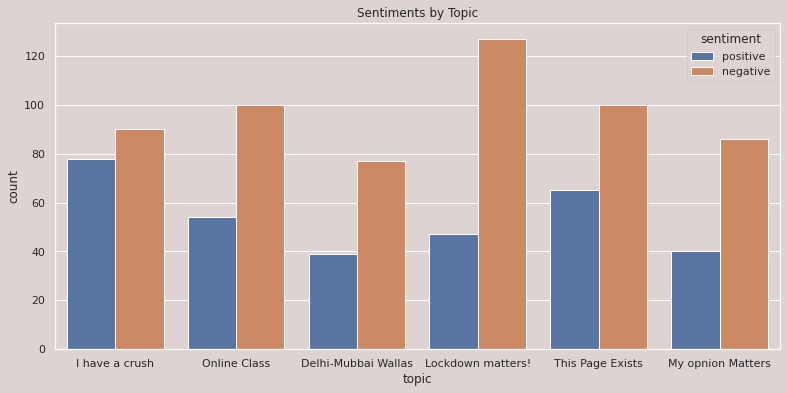

In [112]:
fig, ax= plt.subplots(figsize=(13,6))
sns.countplot(data=sentiments, x="topic", hue="sentiment", dodge=True, ax=ax, hue_order=["positive", "negative"])
plt.xticks(ticks=[0.0,1.0,2.0,3.0,4.0,5.0 ],rotation=0, labels=["I have a crush", "Online Class", "Delhi-Mubbai Wallas", "Lockdown matters!", "This Page Exists", "My opnion Matters"])

plt.title("Sentiments by Topic")

In [125]:
# import graph objects as "go"
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
# create trace1 
trace1 = go.Bar(
                x = sentiments.topic.unique().sort(),
                y = sentiments[sentiments.sentiment=="positive"].topic.value_counts(),
                name = "Positive",
                marker = dict(color = 'lightblue',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = sentiments.id)
# create trace2 
trace2 = go.Bar(
                x = sentiments.topic.unique().sort(),
                y = sentiments[sentiments.sentiment=="negative"].topic.value_counts(),
                name = "negative",
                marker = dict(color = 'tomato',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = sentiments.id)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:

opnions= pd.read_csv("/content/drive/MyDrive/au.rants.23/opnion.csv")
opnions = opnions.merge(sentiments.loc[:, ["id", "topic"]], left_on="rant_id", right_on="id")


Text(0.5, 1.0, 'Sentiment of Opnions by Topic')

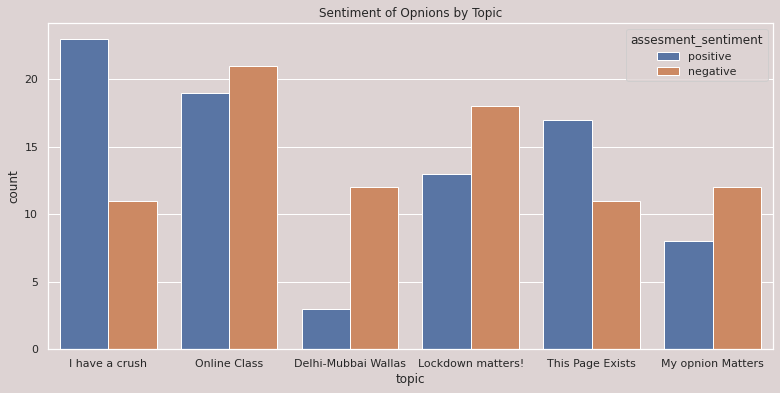

In [106]:

fig, ax= plt.subplots(figsize=(13,6))

sns.countplot(data=opnions, x="topic", hue="assesment_sentiment", ax=ax, hue_order=["positive", "negative"])
plt.xticks(ticks=[0.0,1.0,2.0,3.0,4.0,5.0 ],rotation=0, labels=["I have a crush", "Online Class", "Delhi-Mubbai Wallas", "Lockdown matters!", "This Page Exists", "My opnion Matters"])

plt.title("Sentiment of Opnions by Topic")
